In [15]:
import pvlib
from pvlib.forecast import GFS, NAM, NDFD, HRRR
import datetime
from datetime import timedelta
import scipy
import pandas as pd
import matplotlib.pyplot as plt

In [32]:
# specify location

latitude = 4.604486764168512
longitude =  -74.06584620701403
tz = 'America/Bogota'
#latitude = 32.2
#longitude = -110.9
#tz = 'US/Arizona'


In [60]:
# specify time range of start of today to 7 days
start = pd.Timestamp('2020-12-31', tz=tz)
end = start + timedelta(days=10)

In [61]:
# GFS model, defaults to 0.5 degree resolution
# 0.25 deg available
model = pvlib.forecast.GFS()
# retrieve data. returns pandas.DataFrame object
data = model.get_processed_data(latitude, longitude,
start, end)


,temp_air,wind_speed,ghi,dni,dhi,total_clouds,low_clouds,mid_clouds,high_clouds
2020-12-31 06:00:00-05:00,9.796112,1.170935,0.000000,0.000000,0.000000,93.0,76.0,58.0,64.0
2020-12-31 09:00:00-05:00,9.797913,0.482187,272.352997,32.349410,252.341332,85.0,41.0,83.0,5.0
2020-12-31 12:00:00-05:00,11.145996,0.746896,374.405858,25.565999,351.755129,92.0,65.0,92.0,3.0
2020-12-31 15:00:00-05:00,16.235840,2.014476,314.396813,63.059506,275.536730,74.0,63.0,30.0,12.0
2020-12-31 18:00:00-05:00,19.702484,1.949776,0.000000,0.000000,0.000000,59.0,49.0,30.0,6.0
2020-12-31 21:00:00-05:00,13.836548,1.790959,0.000000,0.000000,0.000000,100.0,31.0,31.0,100.0
2021-01-01 00:00:00-05:00,9.249084,0.858578,0.000000,0.000000,0.000000,99.0,44.0,17.0,98.0
2021-01-01 03:00:00-05:00,7.962616,1.275245,0.000000,0.000000,0.000000,95.0,33.0,0.0,92.0
2021-01-01 06:00:00-05:00,8.851868,0.722823,0.000000,0.000000,0.000000,95.0,56.0,0.0,88.0
2021-01-01 09:00:00-05:00,8.551422,1.015635,212.796695,8.956330,207.263595,100.0,66.0,0.0,93.0


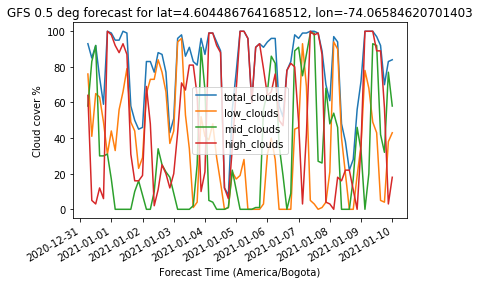

In [64]:
# plot cloud cover percentages
cloud_vars = ['total_clouds', 'low_clouds',
'mid_clouds', 'high_clouds']
data[cloud_vars].plot()
plt.ylabel('Cloud cover %')
plt.xlabel('Forecast Time ({})'.format(tz))
plt.title('GFS 0.5 deg forecast for lat={}, lon={}'.format(latitude, longitude))
plt.legend()
data.head(33)

Timestamp('2021-01-07 00:05:00-0500', tz='America/Bogota')